In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [23]:
DATADIR = "./data"
CATEGORIES = ["isurumuniya_pem_yuwala", "isurumuniya_viharaya", "minisa_saha_ashwa_hisa", "sigiriya_bithu_sithuwam", "sigiriya", "sigiriya_singha_padhaya", "dalada_maligawa", "sri_padhaya", "awkana_buddha_prathimawa", "samadhi_prathimawa", "kiri_vehera", "madirigiriya_watadageya", "nallur_kovil" ]
IMG_SIZE = 128

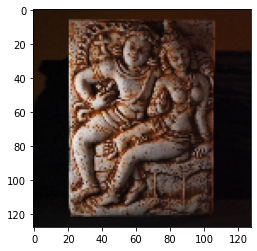

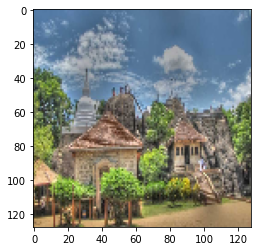

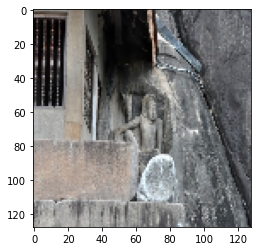

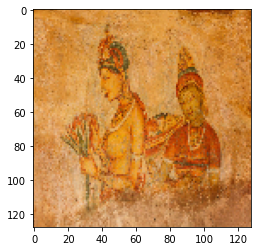

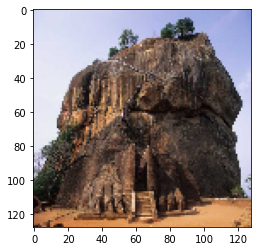

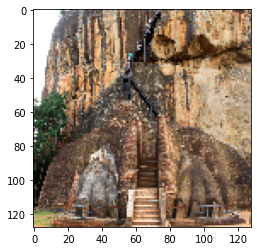

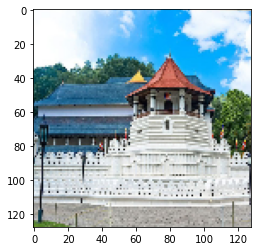

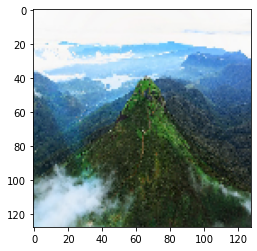

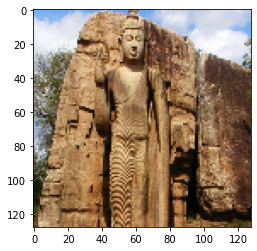

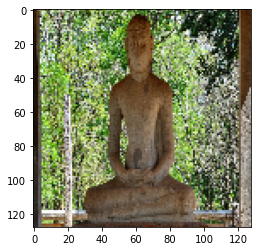

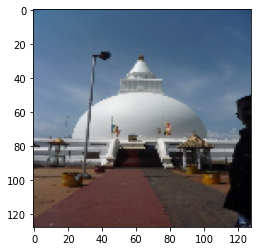

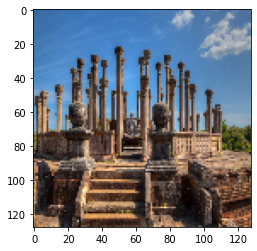

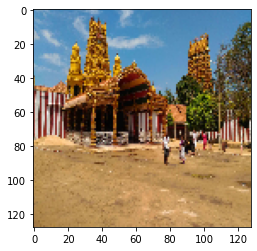

In [24]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array_bgr = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array        
        image_array_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB
        new_array = cv2.resize(image_array_rgb, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array)  # graph it
        plt.show()  # display!
        break

In [25]:
print(new_array.shape)

(128, 128, 3)


In [26]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array_bgr = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                image_array_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB
                new_array = cv2.resize(image_array_rgb, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # to keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|██████████| 100/100 [00:01<00:00, 85.83it/s]

1288


In [27]:
import random

random.shuffle(training_data)

In [28]:
x = []
y = []

for features,label in training_data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

[[[[116 133  76]
   [114 130  84]
   [100 122  78]
   ...
   [174 182 145]
   [ 76  86  42]
   [171 179 136]]

  [[123 140  66]
   [119 137  82]
   [ 92 115  66]
   ...
   [ 90  99  71]
   [ 79  87  52]
   [107 110  88]]

  [[137 151  66]
   [122 142  71]
   [106 130  74]
   ...
   [ 77  85  66]
   [ 72  85  60]
   [ 64  71  59]]

  ...

  [[130 129  89]
   [106 110  63]
   [101 105  55]
   ...
   [152 155  88]
   [144 143  86]
   [144 142  92]]

  [[107 108  58]
   [107 109  56]
   [110 110  57]
   ...
   [151 157  83]
   [139 138  75]
   [146 143  89]]

  [[107 109  56]
   [113 114  60]
   [115 114  60]
   ...
   [143 147  71]
   [125 125  62]
   [136 135  78]]]]


In [29]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [31]:
x = x/255.0
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=x.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(13))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
flatten_2 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x, y, epochs=10, validation_split=0.3)

Train on 901 samples, validate on 387 samples
Epoch 1/10
901/901 [==============================] - 98s 109ms/sample - loss: 2.7244 - accuracy: 0.2331 - val_loss: 2.1053 - val_accuracy: 0.2946
Epoch 2/10
901/901 [==============================] - 99s 110ms/sample - loss: 1.3089 - accuracy: 0.5594 - val_loss: 1.0610 - val_accuracy: 0.6408
Epoch 3/10
901/901 [==============================] - 99s 110ms/sample - loss: 0.8123 - accuracy: 0.7236 - val_loss: 1.0258 - val_accuracy: 0.7132
Epoch 4/10
901/901 [==============================] - 98s 109ms/sample - loss: 0.5441 - accuracy: 0.8380 - val_loss: 1.1091 - val_accuracy: 0.7028
Epoch 5/10
901/901 [==============================] - 97s 108ms/sample - loss: 0.4642 - accuracy: 0.8613 - val_loss: 0.8857 - val_accuracy: 0.7726
Epoch 6/10
901/901 [==============================] - 97s 108ms/sample - loss: 0.2831 - accuracy: 0.9090 - val_loss: 0.7356 - val_accuracy: 0.7984
Epoch 7/10
901/901 [==============================] - 97s 108ms/sample -

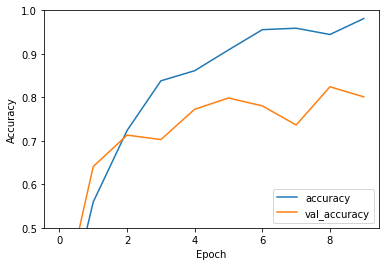

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

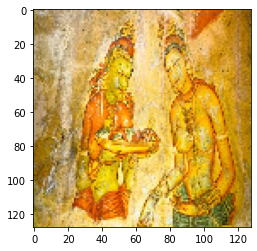

In [41]:
img = DATADIR + "/test3.jpg"
img_array_bgr = cv2.imread(img ,cv2.IMREAD_COLOR)  # convert to array        
image_array_rgb = cv2.cvtColor(img_array_bgr, cv2.COLOR_BGR2RGB) # Convert to RGB
new_array = cv2.resize(image_array_rgb, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)  # graph it
plt.show()  # display!

x = np.array([new_array]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [42]:
y_prob = model.predict(x)
y_prob.argmax(axis=-1)

array([3], dtype=int64)

In [43]:
CATEGORIES

['isurumuniya_pem_yuwala',
 'isurumuniya_viharaya',
 'minisa_saha_ashwa_hisa',
 'sigiriya_bithu_sithuwam',
 'sigiriya',
 'sigiriya_singha_padhaya',
 'dalada_maligawa',
 'sri_padhaya',
 'awkana_buddha_prathimawa',
 'samadhi_prathimawa',
 'kiri_vehera',
 'madirigiriya_watadageya',
 'nallur_kovil']

In [44]:
model.save("places_classifier_model.h5")